In [3]:

import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import torch
import numpy as np

   PLAYER_ID     TEAM_ID   GAME_ID   GAME_DATE  FGM  FGA  FG_PCT  FG3M  FG3A  \
0    1627853  1610612757  22201127  2023-03-27    1    4   0.250     1     2   
1    1627853  1610612757  22201120  2023-03-26    1    6   0.167     1     5   
2    1627853  1610612757  22201104  2023-03-24    0    5   0.000     0     2   
3    1627853  1610612757  22201091  2023-03-22    1    5   0.200     1     4   
4    1627853  1610612757  22201053  2023-03-17    0    0   0.000     0     0   

   FG3_PCT  ...  E_USG_PCT  E_PACE    PACE  PACE_PER40  POSS    PIE  WL_Loss  \
0     0.50  ...      0.126  101.61   98.31       81.93    34  0.025      1.0   
1     0.20  ...      0.114  104.91  105.41       87.84    59  0.022      1.0   
2     0.00  ...      0.124  100.08  100.88       84.06    46  0.023      1.0   
3     0.25  ...      0.104  102.71  103.28       86.07    43 -0.028      0.0   
4     0.00  ...      0.000   66.36   99.54       82.95     2  0.000      1.0   

   WL_Win  MATCHUP_Away  MATCHUP_Home 

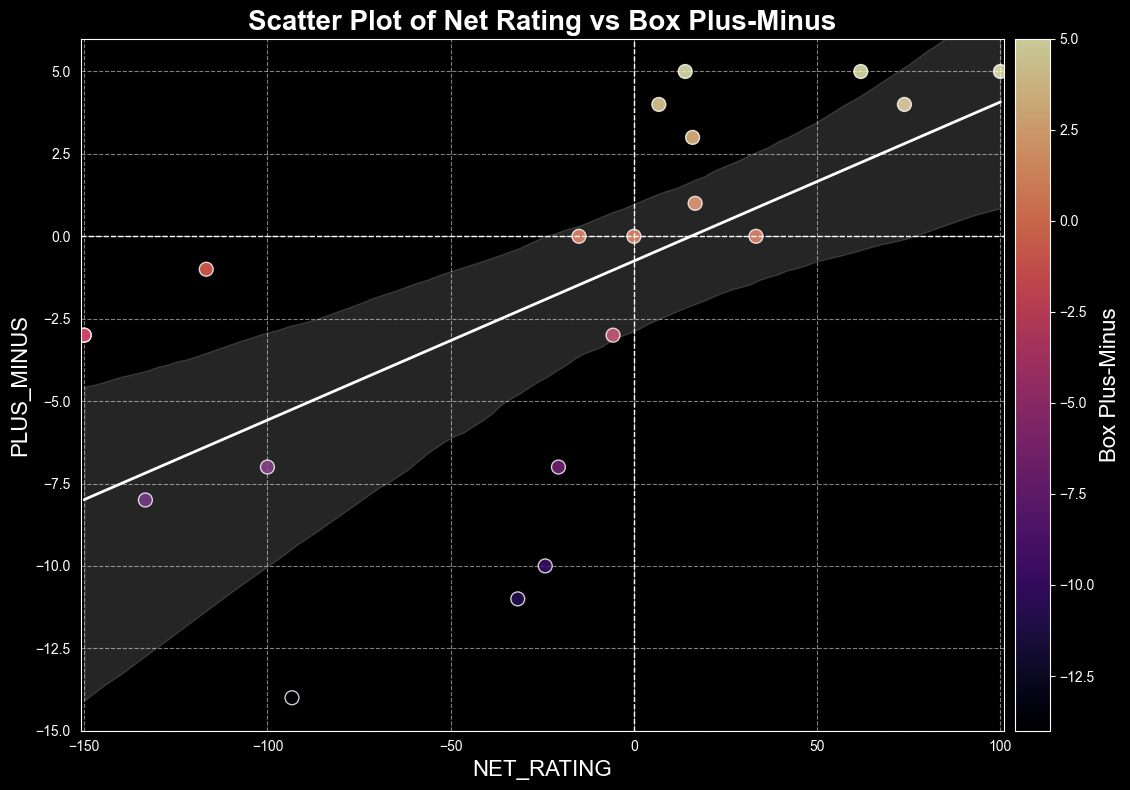

In [4]:
data_path = '/Users/petartodorovic/Desktop/Univeristy /Year 4 - Sem 2/SIS/player_season/final_box&data_player_data_for_2022/1627853.csv'
df = pd.read_csv(data_path)

print(df.head())

print("Columns available in the DataFrame:")
print(df.columns)

df['NET_RATING'] = df['NET_RATING'].fillna(0)
df['PLUS_MINUS'] = df['PLUS_MINUS'].fillna(0)


sns.set_style("darkgrid")

plt.figure(figsize=(12, 8), facecolor='black')  


norm = plt.Normalize(df['PLUS_MINUS'].min(), df['PLUS_MINUS'].max())
cmap = plt.get_cmap("magma")  


scatter = plt.scatter(df['NET_RATING'], df['PLUS_MINUS'], 
                      alpha=0.8, 
                      s=100,  
                      c=df['PLUS_MINUS'],  
                      cmap=cmap,  
                      norm=norm,  
                      edgecolor='white')  


plt.title('Scatter Plot of Net Rating vs Box Plus-Minus', fontsize=20, fontweight='bold', color='white')
plt.xlabel('Net Rating', fontsize=16, color='white')
plt.ylabel('Box Plus-Minus', fontsize=16, color='white')
plt.grid(True, linestyle='--', alpha=0.5, color='white')  


sns.regplot(x='NET_RATING', y='PLUS_MINUS', data=df, scatter=False, color='white', line_kws={'linewidth': 2})


plt.axhline(0, color='white', linestyle='--', linewidth=1)
plt.axvline(0, color='white', linestyle='--', linewidth=1)


plt.xlim(df['NET_RATING'].min() - 1, df['NET_RATING'].max() + 1)
plt.ylim(df['PLUS_MINUS'].min() - 1, df['PLUS_MINUS'].max() + 1)


plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().tick_params(axis='both', colors='white') 


plt.gca().set_facecolor('black')  


cbar = plt.colorbar(scatter, pad=0.01)
cbar.set_label('Box Plus-Minus', fontsize=16, color='white')
cbar.ax.yaxis.set_tick_params(color='white') 
cbar.ax.tick_params(labelcolor='white')  
cbar.ax.set_facecolor('black') 


plt.tight_layout()
plt.show()